In [ ]:
# Librerías para análisis y manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librería para normalizar/escalar variables numéricas
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Permisos Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargamos el dataset con información de vehículos BMW (precios, características y estado general)
bmw = pd.read_csv('bmw_pricing.csv', encoding='latin1')

---
# PASO 1: EXPLORACIÓN INICIAL DEL DATASET (Información, describe y shape)
**Objetivo:** Cargar el dataset y realizar una primera inspección de sus características principales

In [ ]:
# Información general del dataset: nº de filas, columnas y tipos de datos
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [ ]:
# Tamaño del dataset: (n_filas, n_columnas)
bmw.shape

(4843, 18)

In [ ]:
# Estadísticas descriptivas de las columnas numéricas
bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [ ]:
# Imprimir número de valores únicos por cada variable
bmw.nunique()

,0
marca,1
modelo,76
km,4784
potencia,61
fecha_registro,180
tipo_gasolina,5
color,10
tipo_coche,8
volante_regulable,2
aire_acondicionado,2


In [ ]:
# Imprimir valores unicos por cada columna
for col in bmw.columns:
	print('\n', col, bmw[col].unique())


 marca [nan 'BMW']

 modelo ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran CoupÃ©' '435 Gran CoupÃ©' 'i8' '630' '430 Gran CoupÃ©' '635'
 '520' nan '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523'
 'X3' 'M550' '528' '325 Gran Turismo' '125' '318 Gran Turismo'
 '420 Gran CoupÃ©' 'i3' '114' '520 Gran Turismo' '530 Gran Turismo' 'M135'
 '418 Gran CoupÃ©' '330 Gran Turismo' '335 Gran Turismo' '730' '123'
 '535 Gran Turismo' '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4'
 'X6' 'X6 M' 'X5 M' 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216'
 '220 Active Tourer' '216 Gran Tourer' '216 Active Tourer'
 ' Active Tourer' '225 Active Tourer' '214 Gran Tourer']

 km [140411.  13929. 183297. ...  19633.  27920. 195840.]

 potencia [100. 317. 120. 135. 160. 225. 145. 105. 125. 130. 270. 110. 140. 180.
  85. 190. 236. 240. 250. 230. 309. 170. 142. 155. 210.  nan 122. 200.
  90. 150. 1

---
# PASO 2: Data Cleaning: duplicados, nulos, outliers y coherencia lógica

**Acciones realizadas:**
- Eliminar registros duplicados para evitar sesgo en el análisis
- Eliminar nulos de la variable target (precio)
- Calcular porcentaje de nulos por variable ordenado de mayor a menor
- Descartar `asientos_traseros_plegables` (70% nulos)
- Eliminar `marca` (sin variabilidad, solo 'BMW')

In [ ]:
# Ver y eliminar los registros duplicados para evitar que ciertas observaciones tengan más peso del debido en el análisis.
print("\nRegistros duplicados antes de eliminar:", bmw.duplicated().sum())
bmw = bmw.drop_duplicates()
print("Registros duplicados después de eliminar:", bmw.duplicated().sum())


Registros duplicados antes de eliminar: 0
Registros duplicados después de eliminar: 0


In [ ]:
# Eliminar nulos de la variable precio
bmw = bmw.dropna(subset=['precio'])

In [ ]:
# Declarar target la variable precio
target = ['precio']

In [ ]:
# Crear una función que calcule el porcentaje de nulos por variable y visualizar los resultados ordenados
def porcentaje_nulos(bmw):
    nulos_dict = {}
    for col in bmw.columns:
        pct = bmw[col].isnull().sum() / len(bmw) * 100
        nulos_dict[col] = pct

    # Ordenar de mayor a menor
    for col, pct in sorted(nulos_dict.items(), key=lambda x: x[1], reverse=True):
        print(f'El % de nulos de {col} es: {pct:.2f}%')

# Llamar la función
porcentaje_nulos(bmw)

El % de nulos de asientos_traseros_plegables es: 70.04%
El % de nulos de fecha_registro es: 49.99%
El % de nulos de tipo_coche es: 30.14%
El % de nulos de marca es: 20.05%
El % de nulos de bluetooth es: 15.05%
El % de nulos de alerta_lim_velocidad es: 15.05%
El % de nulos de aire_acondicionado es: 10.03%
El % de nulos de color es: 9.18%
El % de nulos de tipo_gasolina es: 0.10%
El % de nulos de volante_regulable es: 0.08%
El % de nulos de modelo es: 0.06%
El % de nulos de km es: 0.04%
El % de nulos de camara_trasera es: 0.04%
El % de nulos de elevalunas_electrico es: 0.04%
El % de nulos de potencia es: 0.02%
El % de nulos de fecha_venta es: 0.02%
El % de nulos de gps es: 0.00%
El % de nulos de precio es: 0.00%


In [ ]:
#  Descartar la variable asientos_traseros_plegables por presentar un más de 70% de valores nulos.
bmw = bmw.drop(columns=['asientos_traseros_plegables'])

In [ ]:
# Eliminar la variable marca al contar únicamente con un registro (no aporta variabilidad).
bmw = bmw.drop(columns=['marca'])

In [ ]:
# describe de fecha de registro y venta
print(bmw[['fecha_registro', 'fecha_venta']].describe())

       fecha_registro fecha_venta
count            2419        4836
unique            180          13
top        2013-07-01  2018-05-01
freq               93         808


In [ ]:
# top fechas de venta desde la mas antigua a las mas reciente
print(bmw['fecha_venta'].value_counts().sort_index().head())

fecha_venta
2007-08-01      1
2008-06-01      1
2009-04-01      1
2010-04-01      1
2018-01-01    208
Name: count, dtype: int64


In [ ]:
#Eliminar fechas de ventas inferiores al 2018
bmw = bmw[bmw['fecha_venta'] >= '2018-01-01']
print(bmw['fecha_venta'].value_counts().sort_index().head())

fecha_venta
2018-01-01    208
2018-02-01    500
2018-03-01    735
2018-04-01    691
2018-05-01    808
Name: count, dtype: int64


---
## TRATAMIENTO DE FECHAS Y CREACIÓN DE EDAD_COCHE
**Objetivo:** Convertir fechas a formato datetime, crear variable `edad_coche` (años entre registro y venta) y eliminar fechas anteriores a 2018

In [ ]:
# Convertir fechas a año y crear variable edad_coche
bmw['fecha_registro'] = pd.to_datetime(bmw['fecha_registro'])
bmw['fecha_venta'] = pd.to_datetime(bmw['fecha_venta'])

In [ ]:
# Calcular edad del coche en años (año_venta - año_registro)
bmw['edad_coche'] = bmw['fecha_venta'] - bmw['fecha_registro']

In [ ]:
# Convertir a decimal usando días exactos y redondear hacia arriba
bmw['edad_coche'] = ((bmw['fecha_venta'] - bmw['fecha_registro']).dt.days / 365.25).apply(np.ceil)

In [ ]:
# Verificar resultado
bmw['edad_coche'].describe()

,edad_coche
count,2417.000000
mean,5.868018
std,2.546659
min,1.000000
25%,5.000000
50%,5.000000
75%,6.000000
max,29.000000


In [ ]:
# Eliminar variables fecha_registro y fecha_venta
bmw = bmw.drop(columns=['fecha_registro', 'fecha_venta'])

In [ ]:
# Convertir la variable GPS a object
bmw['gps'] = bmw['gps'].astype(object)

In [ ]:
# Función para obtener listas de variables según su tipo
def obtener_lista_variables(df, target):
    lista_numericas = []
    lista_boolean = []
    lista_categoricas = []

    for col in df.columns:
        if col == target:
            continue

        # Variables numéricas (float o int) con más de 2 valores únicos
        if (df[col].dtype.kind in ['f', 'i']) and len(df[col].unique()) > 2:
            lista_numericas.append(col)

        # Variables booleanas (float o int) con exactamente 2 valores únicos
        elif (df[col].dtype.kind in ['f', 'i']) and len(df[col].unique()) == 2:
            lista_boolean.append(col)

        # Variables categóricas (object)
        elif df[col].dtype.kind == 'O':
            lista_categoricas.append(col)

    return lista_numericas, lista_boolean, lista_categoricas

# Obtener listas de variables
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(bmw, 'precio')

print("Variables numéricas:", lista_numericas)
print("\nVariables booleanas:", lista_boolean)
print("\nVariables categóricas:", lista_categoricas)

Variables numéricas: ['km', 'potencia', 'edad_coche']

Variables booleanas: []

Variables categóricas: ['modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']


---
## TRATAMIENTO DE KILOMETRAJE
**Objetivo:** Crear funciones para clasificar automáticamente variables (numéricas, booleanas, categóricas) y calcular correlaciones con el target

In [ ]:
#copia el dataset limpio
bmw_km = bmw.copy()

In [ ]:
#describe de variable km
bmw_km['km'].describe()

,km
count,4.830000e+03
mean,1.408770e+05
std,6.014453e+04
min,-6.400000e+01
25%,1.027825e+05
50%,1.409475e+05
75%,1.751735e+05
max,1.000376e+06


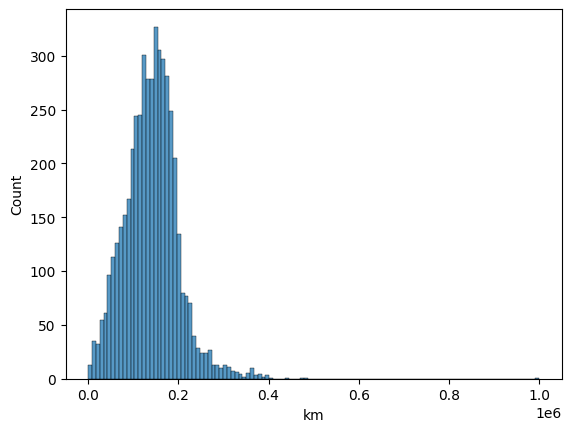

In [ ]:
# Observamos la distribución de los datos de la variable km.
sns.histplot(data=bmw_km, x="km");

In [ ]:
# Tratamiento de la variable km: eliminar/imputar valores no coherentes. Observamos valores muy por encima de la distribución de los datos. Creamos un df para obervar los outliers.
bmw_km[(bmw_km['km']>500000)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche
3732,118,1000376.0,90.0,diesel,NaN,NaN,True,False,False,False,NaN,True,False,1400.0,14.0


In [ ]:
# Como no es común ver coches con un nivel tan alto de kilometraje a vender-se, decidimos que no es bueno para el modelo, y nos deshacemos del registro.

# Eliminar valores negativos o no coherentes (km < 0)
bmw_km = bmw_km[bmw_km['km'] >= 0]

# Eliminamos el valor outlier de 1.000.000 de km.
bmw_km = bmw_km[bmw_km['km'] < 500000]

# Crear bins de kilometraje de 30k en 30k (8 bins total) para poder imputar la moda en las variables categóricas.
bins_km = [0, 30000, 60000, 90000, 120000, 150000, 180000, 210000, float('inf')]
labels_km = ['0-30k', '30-60k', '60-90k', '90-120k', '120-150k', '150-180k', '180-210k', '+210k']

bmw_km['km_bins'] = pd.cut(bmw_km['km'], bins=bins_km, labels=labels_km, include_lowest=True)

# Verificar distribución
bmw_km['km_bins'].value_counts().sort_index()

,count
km_bins,
0-30k,116
30-60k,291
60-90k,500
90-120k,798
120-150k,1020
150-180k,1052
180-210k,618
+210k,433


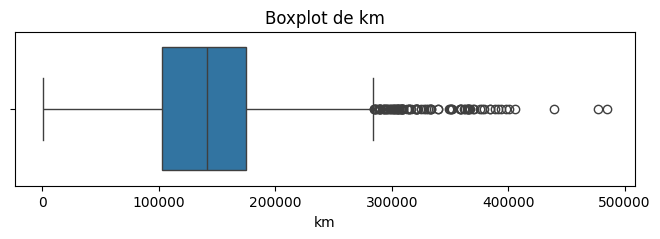

In [ ]:
# Observamos como ha quedado la distribución de los datos de la variable.
plt.figure(figsize=(8, 2))
sns.boxplot(data=bmw_km, x='km')
plt.title('Boxplot de km')
plt.show()

In [ ]:
#Llamamos a la función del porcentaje de nulos para decidir el orden de imputación
porcentaje_nulos(bmw_km)

El % de nulos de edad_coche es: 49.98%
El % de nulos de tipo_coche es: 30.12%
El % de nulos de bluetooth es: 15.06%
El % de nulos de alerta_lim_velocidad es: 15.04%
El % de nulos de aire_acondicionado es: 10.02%
El % de nulos de color es: 9.18%
El % de nulos de tipo_gasolina es: 0.10%
El % de nulos de volante_regulable es: 0.08%
El % de nulos de modelo es: 0.06%
El % de nulos de camara_trasera es: 0.04%
El % de nulos de elevalunas_electrico es: 0.04%
El % de nulos de potencia es: 0.02%
El % de nulos de km es: 0.00%
El % de nulos de gps es: 0.00%
El % de nulos de precio es: 0.00%
El % de nulos de km_bins es: 0.00%


IMPUTACION DE NULOS

El orden de imputación de nulos será ascendente porque así al utilizar esas categorías para
imputar las demás todas las otras imputaciones serán mas fiables.

Decidimos borrar los registros de las variables con menos de un 1% de nulos, para poder lidiar después con las que tienen un numero significativo de registros nulos. Estas variables són: **tipo_gasolina, volante_regulable, modelo, km, camara_trasera, elevalunas_electrico y potencia.**

In [ ]:
# Creamos una lista con las variables a borrar nulos:
cols_drop = ['tipo_gasolina','volante_regulable','modelo','km','camara_trasera','elevalunas_electrico','potencia']

# Llamamos a dropna para la lista:
bmw_km = bmw_km.dropna(subset=cols_drop)

In [ ]:
# Estadísticas descriptivas de las columnas numéricas
bmw_km.describe()

,km,potencia,precio,edad_coche
count,4811.000000,4811.000000,4811.000000,2405.000000
mean,140722.809811,128.971108,15836.499688,5.864033
std,58876.224546,38.985548,9185.515021,2.544654
min,476.000000,0.000000,100.000000,1.000000
25%,102746.500000,100.000000,10900.000000,5.000000
50%,140829.000000,120.000000,14200.000000,5.000000
75%,175173.000000,135.000000,18600.000000,6.000000
max,484615.000000,423.000000,178500.000000,29.000000


---
## TRATAMIENTO DE POTENCIA
**Objetivo:** Limpiar outliers y valores no coherentes en potencia

**Acciones:**
- Eliminar potencias = 0 (incoherentes)
- Imputar potencias ≤25 en modelo i3 con su moda
- Eliminar potencias >400 (outliers extremos)

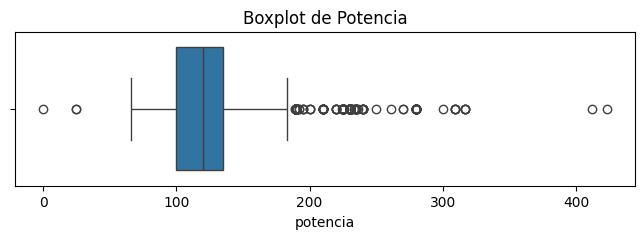

In [ ]:
# boxplot de potencia, distribución de los datos
plt.figure(figsize=(8, 2))
sns.boxplot(x='potencia', data=bmw_km)
plt.title('Boxplot de Potencia')
plt.show()

In [ ]:
# eliminar de potencia los valores que tengan 0. Son físicamente imposibles.
bmw_km = bmw_km[bmw_km['potencia'] > 0]

Aquí nos encontramos con algunos datos curiosos. Vamos a crear un dataset aparte para estudiar el valor de los outliers.

In [ ]:
bmw_km[(bmw_km['potencia']<50) | (bmw_km['potencia']>400)]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche,km_bins
1796,i3,152328.0,25.0,hybrid_petrol,black,NaN,False,True,False,False,False,True,NaN,20300.0,NaN,150-180k
1925,i3,152470.0,25.0,hybrid_petrol,black,hatchback,False,True,False,False,False,True,True,15500.0,NaN,150-180k
3601,M5,150187.0,412.0,petrol,white,sedan,True,True,True,True,True,True,True,41600.0,NaN,150-180k
4146,X6 M,2970.0,423.0,petrol,red,suv,True,NaN,True,False,False,True,True,82400.0,2.0,0-30k


In [ ]:
# ver que modelos tienen potencia menor o igual a 30 y superior a 400 y su potencia
print(bmw_km[(bmw_km['potencia'] <= 30) | (bmw_km['potencia'] > 400)][['modelo', 'potencia']])

     modelo  potencia
1796     i3      25.0
1925     i3      25.0
3601     M5     412.0
4146   X6 M     423.0


In [ ]:
# Calcular la moda de potencia para el modelo i3
moda_i3 = bmw_km[bmw_km['modelo'] == 'i3']['potencia'].mode()[0]

# En los BMW i3 no existe ningún modelo cuya potencia “principal” sea 25; todos los i3 llevan siempre un motor eléctrico de almenos 125
# modelo i3 potencia menor de igual o menor a 25 pasar pasar el valor a la moda de i3
bmw_km.loc[(bmw_km['modelo'] == 'i3') & (bmw_km['potencia'] <= 25), 'potencia'] = moda_i3

In [ ]:
# drop de las potencias superiores de 400
bmw_km = bmw_km[bmw_km['potencia'] <= 400]
bmw_km[['potencia']].describe()

,potencia
count,4808.000000
mean,128.898710
std,38.463245
min,66.000000
25%,100.000000
50%,120.000000
75%,135.000000
max,317.000000


Vamos a arreglar los valores no coherentes de las variables sin nulos, para después seguir con las variables con menos nulos en orden ascendente.

---
## TRATAMIENTO DE TIPO_GASOLINA
**Objetivo:** Estandarizar categorías y agrupar tipos raros

**Acciones:**
- Cambiar 'Diesel' → 'diesel' (estandarizar)
- Agrupar 'electro' y 'hybrid_petrol' → 'eco_fuel' (baja frecuencia)
- Eliminar los valores nulos

In [ ]:
# copy del dataset limpio final
bmw_gas = bmw_km.copy()

In [ ]:
# tipo_gasolina unique
bmw_gas['tipo_gasolina'].unique()

array(['diesel', 'petrol', 'hybrid_petrol', 'Diesel', 'electro'],
      dtype=object)

In [ ]:
# Cambiar el valor 'Diesel' a 'diesel' en tipo_gasolina
bmw_gas['tipo_gasolina'] = bmw_gas['tipo_gasolina'].replace(['Diesel'], 'diesel')

In [ ]:
# Cambiar el valor 'hybrid_petrol' a 'eco_fuel' en tipo_gasolina
bmw_gas['tipo_gasolina'] = bmw_gas['tipo_gasolina'].replace(['electro','hybrid_petrol'], 'eco_fuel')

In [ ]:
bmw_gas['tipo_gasolina'].unique()

array(['diesel', 'petrol', 'eco_fuel'], dtype=object)

---
## ANÁLISIS DE VARIABLES BOOLEANAS SIN NULOS
**Objetivo:** Verificar distribución de variables binarias completas (volante_regulable, elevalunas_electrico, gps)

In [ ]:
# value count volante regulable
bmw_gas['volante_regulable'].value_counts(normalize=True) * 100

,proportion
volante_regulable,
True,55.012479
False,44.987521


Elevaluna electrico

In [ ]:
# value count elevaluna electrico y su representacion en %
bmw_gas['elevalunas_electrico'].value_counts(normalize=True) * 100

,proportion
elevalunas_electrico,
False,53.91015
True,46.08985


GPS

In [ ]:
# value count gps y su %
bmw_gas['gps'].value_counts(normalize=True) * 100

,proportion
gps,
True,93.261231
False,6.738769


Se observa una varianza de la variable excesivamente baja. No parece una variable muy representativa.

---
## TRATAMIENTO DE MODELO - CLASIFICACIÓN POR SERIES BMW
**Objetivo:** Reducir cardinalidad de modelo agrupando en series BMW estándar

**Estrategia:**
- Crear función que clasifica modelos en: Serie 1-8, Serie X, Serie M, Serie i, Serie Z
- Renombrar modelos inconsistentes (' Active Tourer' → '218 Active Tourer')
- Mantener valores nulos sin cambios

In [ ]:
# Modelos
bmw_gas['modelo'].unique() # Hay 76 categorias, pero creo que algunas se podrían agrupar

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '225', 'M235', '316',
       '435', '640', '640 Gran CoupÃ©', '435 Gran CoupÃ©', 'i8', '330',
       '630', '430 Gran CoupÃ©', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran CoupÃ©', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran CoupÃ©', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'X5', 'X1', 'X4', 'X6', 'X6 M', 'X5 M',
       'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [ ]:
# Gran Coupé está mal escrito, sustituir el carácter "Ã©" por "é"
bmw_gas['modelo'] = bmw_gas['modelo'].str.replace('Ã©', 'é')

In [ ]:
# copy del dataset
bmw_model = bmw_gas.copy()

In [ ]:
# Ver todos los value counts de modelo sin truncar y de mayor a menor
pd.set_option('display.max_rows', None)
bmw_model['modelo'].value_counts(ascending=False)

,count
modelo,
320,745
520,630
318,562
X3,437
116,358
X1,273
316,232
X5,231
525,182


In [ ]:
def agrupar_modelo(modelo):
    if pd.isna(modelo):
        return 'Desconocido'
    modelo = modelo.strip().upper()

    # --- Excepciones o casos únicos primero ---
    if 'ACTIVEHYBRID 5' in modelo:
        return '5'
    elif 'TOURER' in modelo:
        return '2' # Active/Gran Tourer'

    # --- Series principales ---
    if modelo.startswith('1'):
        return '1'
    elif modelo.startswith('2'):
        return '2'
    elif modelo.startswith('3'):
        return '3'
    elif modelo.startswith('4'):
        return '4'
    elif modelo.startswith('5'):
        return '5'
    elif modelo.startswith('6'):
        return '6'
    elif modelo.startswith('7'):
        return '7'
    elif modelo.startswith('8'):
        return '8'
    elif modelo.startswith('X'):
        return 'X'
    elif modelo.startswith('M'):
        return 'M'
    elif modelo.startswith('I'):
        return 'i'
    elif modelo.startswith('Z'):
        return 'Z'
    else:
        return 'Otros'

# Reemplazar directamente en el DataFrame original
bmw_model['serie'] = bmw_model['modelo'].apply(agrupar_modelo)

# Verificar los resultados
bmw_model['serie'].value_counts()

,count
serie,
Serie 3,1782
Serie 5,1134
Serie X,1058
Serie 1,562
Serie 4,101
Serie 7,54
Serie 2,50
Serie 6,29
Serie M,25


In [ ]:
# Modelo y Serie son variables muy importantes, asi que de momento conservaremos la variable modelo para poder imputar los NANS de las categoricas de forma mas precisa.
bmw_model = bmw_model.dropna(subset=['modelo'])

---
## IMPUTACIÓN JERÁRQUICA DE NULOS DE LAS VARIABLES CATEGÓRICAS
**Objetivo:** Imputar valores faltantes usando estrategia de grupos jerárquicos (de más específico a más general)


**Variables a imputar:** aire_acondicionado, color, tipo_coche, bluetooth, alerta_lim_velocidad, edad_coche

In [ ]:
# Volvemos a obervar el porcentaje de nulos para decidir que variables imputar primero.
porcentaje_nulos(bmw_model)

El % de nulos de edad_coche es: 50.02%
El % de nulos de tipo_coche es: 30.10%
El % de nulos de bluetooth es: 15.06%
El % de nulos de alerta_lim_velocidad es: 15.02%
El % de nulos de aire_acondicionado es: 9.98%
El % de nulos de color es: 9.17%
El % de nulos de modelo es: 0.00%
El % de nulos de km es: 0.00%
El % de nulos de potencia es: 0.00%
El % de nulos de tipo_gasolina es: 0.00%
El % de nulos de volante_regulable es: 0.00%
El % de nulos de camara_trasera es: 0.00%
El % de nulos de elevalunas_electrico es: 0.00%
El % de nulos de gps es: 0.00%
El % de nulos de precio es: 0.00%
El % de nulos de km_bins es: 0.00%
El % de nulos de serie es: 0.00%


### Aire Acondicionado
**Método:** Imputación por jerarquía de grupos usando moda

In [ ]:
# copy del dataset
bmw_nulls = bmw_model.copy()

In [ ]:
# Definir jerarquía de agrupación según correlaciones descendentes
groups = [
    ['potencia', 'modelo', 'volante_regulable', 'gps'],
    ['potencia', 'modelo', 'volante_regulable'],
    ['modelo', 'potencia'],
    ['modelo'],
    ['serie']
]

# Rellenar aire_acondicionado progresivamente según cada nivel de agrupación
for group in groups:
    bmw_nulls['aire_acondicionado'] = bmw_nulls.groupby(
        group
    )['aire_acondicionado'].transform(lambda O: O.mode().iat[0] if not O.mode().empty else np.nan)
    print("NaNs en 'aire_acondicionado' después de la imputación:")
    display(bmw_nulls['aire_acondicionado'].isnull().sum())

NaNs en 'aire_acondicionado' después de la imputación:


np.int64(26)

NaNs en 'aire_acondicionado' después de la imputación:


np.int64(21)

NaNs en 'aire_acondicionado' después de la imputación:


np.int64(11)

NaNs en 'aire_acondicionado' después de la imputación:


np.int64(2)

NaNs en 'aire_acondicionado' después de la imputación:


np.int64(0)

### Color
**Método:** Imputación con categoría 'desconocido' (honesto con la falta de información)

In [ ]:
# Imputar los nulos de la columna color por 'desconocido'
bmw_nulls['color'] = bmw_nulls['color'].fillna('desconocido')

### Tipo Coche
**Método:** Imputación jerárquica usando moda por grupos (misma jerarquía que aire_acondicionado)

In [ ]:
# Definir jerarquía de agrupación según correlaciones descendentes
groups = [
    ['modelo', 'potencia'],
    ['modelo'],
    ['serie']
]

# Rellenar tipo_coche progresivamente según cada nivel de agrupación
for group in groups:
    bmw_nulls['tipo_coche'] = bmw_nulls.groupby(
        group
    )['tipo_coche'].transform(lambda O: O.mode().iat[0] if not O.mode().empty else np.nan)
    print("NaNs en 'tipo_coche' después de la imputación:")
    display(bmw_nulls['tipo_coche'].isnull().sum())

NaNs en 'tipo_coche' después de la imputación:


np.int64(19)

NaNs en 'tipo_coche' después de la imputación:


np.int64(0)

NaNs en 'tipo_coche' después de la imputación:


np.int64(0)

### Bluetooth

In [ ]:
# Jerarquía de agrupación según correlaciones descendentes
grupos = [
    ['modelo', 'potencia', 'gps'],                           # Nivel 1: grupo completo
    ['modelo', 'potencia'],                                  # Nivel 2: quitar 'gps'
    ['modelo'],                                              # Nivel 3: quitar potencia
    ['serie']                                                # Nivel 4: fallback mínimo (generalmente este nivel no es necesario)
]

# Rellenar bluetooth progresivamente según cada nivel de agrupación
for group in groups:
    bmw_nulls['bluetooth'] = bmw_nulls.groupby(
        group
    )['bluetooth'].transform(lambda O: O.mode().iat[0] if not O.mode().empty else np.nan)
    print("NaNs en 'bluetooth' después de la imputación:")
    display(bmw_nulls['bluetooth'].isnull().sum())

NaNs en 'bluetooth' después de la imputación:


np.int64(14)

NaNs en 'bluetooth' después de la imputación:


np.int64(1)

NaNs en 'bluetooth' después de la imputación:


np.int64(0)

### Alerta Límite de Velocidad
**Método:** Imputación jerárquica usando moda por grupos

In [ ]:
# Jerarquía de agrupación según correlaciones descendentes
grupos = [
    ['modelo', 'potencia', 'elevalunas_electrico'],
    ['modelo', 'potencia'],
    ['modelo'],
    ['serie']
]
# Rellenar alerta_lim_velocidad progresivamente según cada nivel de agrupación
for group in groups:
    bmw_nulls['alerta_lim_velocidad'] = bmw_nulls.groupby(
        group
    )['alerta_lim_velocidad'].transform(lambda O: O.mode().iat[0] if not O.mode().empty else np.nan)
    print("NaNs en 'alerta_lim_velocidad' después de la imputación:")
    display(bmw_nulls['alerta_lim_velocidad'].isnull().sum())

NaNs en 'alerta_lim_velocidad' después de la imputación:


np.int64(11)

NaNs en 'alerta_lim_velocidad' después de la imputación:


np.int64(1)

NaNs en 'alerta_lim_velocidad' después de la imputación:


np.int64(0)

### Edad del Coche
**Método:** Imputación jerárquica usando moda por grupos (característica de seguridad correlacionada con modelo y año)

In [ ]:
bmw_nulls1 = bmw_nulls.copy() # Hago una copia para comparar el antes y el después

In [ ]:
# Rellenar edad_coche progresivamente según cada nivel de agrupación
grupos = [
    ['km_bins', 'modelo', 'tipo_coche'],
    ['km_bins', 'modelo'],
    ['km_bins']
]

# Rellenar edad_coche progresivamente según cada nivel de agrupación
for group in grupos:
    bmw_nulls1['edad_coche'] = bmw_nulls1.groupby(group, observed=False)['edad_coche'].transform(
        lambda x: x.fillna(x.mode().iat[0]) if not x.mode().empty else np.nan
    )
    print("NaNs en 'edad_coche' después de la imputación:")
    display(bmw_nulls1['edad_coche'].isnull().sum())

NaNs en 'edad_coche' después de la imputación:


np.int64(94)

NaNs en 'edad_coche' después de la imputación:


np.int64(94)

NaNs en 'edad_coche' después de la imputación:


np.int64(0)

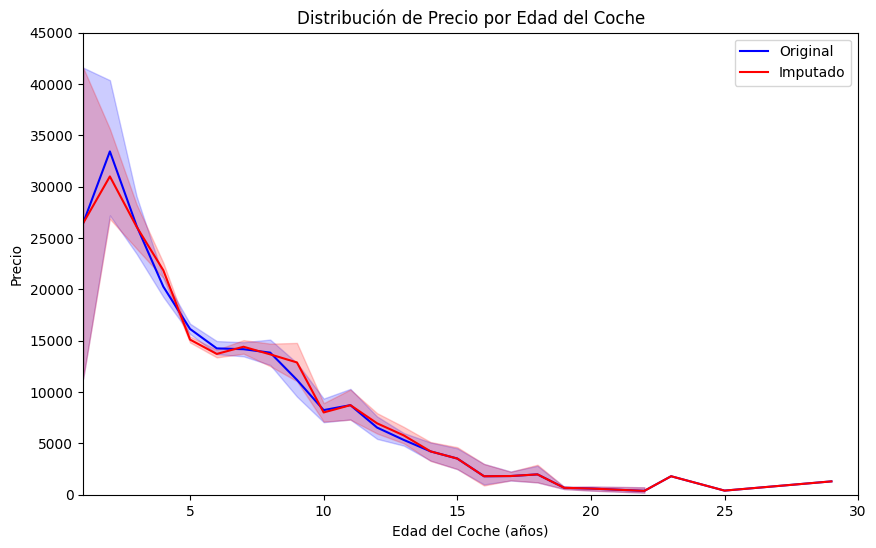

In [ ]:
# Comparar la distrubución antes y después de imputar
plt.figure(figsize=(10,6))
sns.lineplot(x='edad_coche', y='precio', data=bmw_nulls, color='blue', label = 'Original')
sns.lineplot(x='edad_coche', y='precio', data=bmw_nulls1, color='red', label = 'Imputado')
plt.title('Distribución de Precio por Edad del Coche')
plt.xlabel('Edad del Coche (años)')
plt.ylabel('Precio')
plt.xlim(1,30)
plt.ylim(0,45000)
plt.legend()
plt.show()

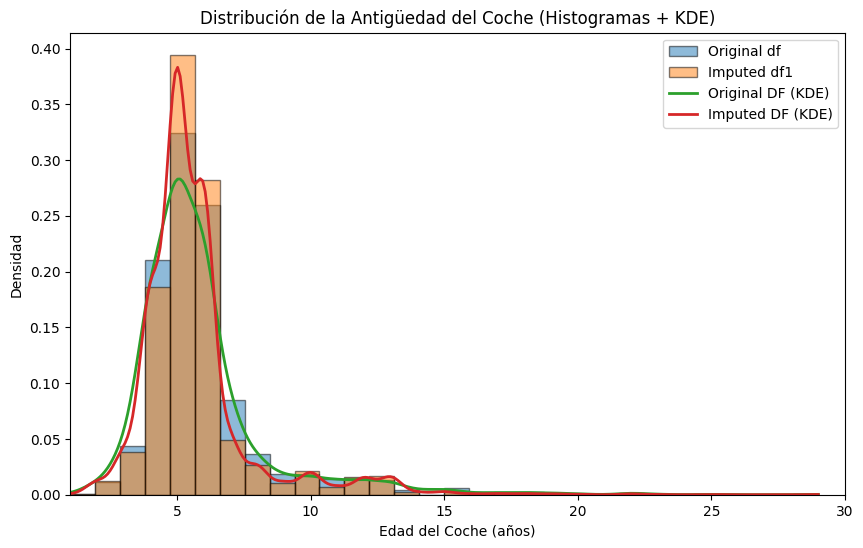

In [ ]:
# Comparar la distrubución antes y después de imputar
from scipy.stats import gaussian_kde

plt.figure(figsize=(10,6))

# Datos
x0 = bmw_nulls['edad_coche'].dropna()
x1 = bmw_nulls1['edad_coche'].dropna()

# Histogramas como antes
plt.hist(x0, bins=30, density=True, edgecolor='black', alpha=0.5, label='Original df')
plt.hist(x1, bins=30, density=True, edgecolor='black', alpha=0.5, label='Imputed df1')

# KDE LINES
# Rango común
xs = np.linspace(min(x0.min(), x1.min()), max(x0.max(), x1.max()), 300)

kde0 = gaussian_kde(x0)
kde1 = gaussian_kde(x1)

plt.plot(xs, kde0(xs), linewidth=2, label='Original DF (KDE)')
plt.plot(xs, kde1(xs), linewidth=2, label='Imputed DF (KDE)')

# Títulos y formato
plt.title('Distribución de la Antigüedad del Coche (Histogramas + KDE)')
plt.xlabel('Edad del Coche (años)')
plt.ylabel('Densidad')
plt.xlim(1,30)
plt.legend()

plt.show()

In [ ]:
# Ahora sí, nos deshacemos de las variables que no necesitamos, en este caso, variable modelo y km_bins.
variables = ['modelo','km_bins']
bmw_nulls1.drop(columns=variables, inplace=True)

In [ ]:
bmw_nulls1.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche,serie
0,140411.0,100.0,diesel,black,hatchback,True,1.0,False,True,0.0,True,0.0,11300.0,6.0,Serie 1
1,13929.0,317.0,petrol,grey,sedan,True,1.0,False,False,1.0,True,1.0,69700.0,3.0,Serie M
2,183297.0,120.0,diesel,white,estate,False,1.0,False,True,0.0,True,0.0,10200.0,6.0,Serie 3
3,128035.0,135.0,diesel,red,coupe,True,1.0,False,True,1.0,True,1.0,25100.0,5.0,Serie 4
4,97097.0,160.0,diesel,silver,coupe,True,1.0,False,False,1.0,True,1.0,33400.0,5.0,Serie 4


#PASO 3: CORRELACIONES, VISUALIZACIÓN Y ANÁLISIS DEL TARGET

---



In [ ]:
df_limpio = bmw_nulls1.copy()

Seguidamente, observamos el mapa de correlaciones para ver si hay una o mas variables que se expliquen entre ellas.

In [ ]:
corr = df_limpio.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,aire_acondicionado,bluetooth,alerta_lim_velocidad,precio,edad_coche
km,1.000000,-0.044345,0.021723,-0.141658,-0.000327,-0.412279,0.538353
potencia,-0.044345,1.000000,-0.000246,0.180767,0.505905,0.635610,-0.101865
aire_acondicionado,0.021723,-0.000246,1.000000,0.005799,0.035407,0.024463,-0.018442
bluetooth,-0.141658,0.180767,0.005799,1.000000,0.163775,0.208402,-0.119651
alerta_lim_velocidad,-0.000327,0.505905,0.035407,0.163775,1.000000,0.445063,-0.042439
precio,-0.412279,0.635610,0.024463,0.208402,0.445063,1.000000,-0.407059
edad_coche,0.538353,-0.101865,-0.018442,-0.119651,-0.042439,-0.407059,1.000000


Observamos una correlación directamente proporcional entre edad_coche y potencia, así como entre precio y potencia.
Por otro lado, se aprecia una correlación inversamente proporcional entre precio y km, así como entre precio y edad_coche.

## ANÁLISIS DEL TARGET:

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

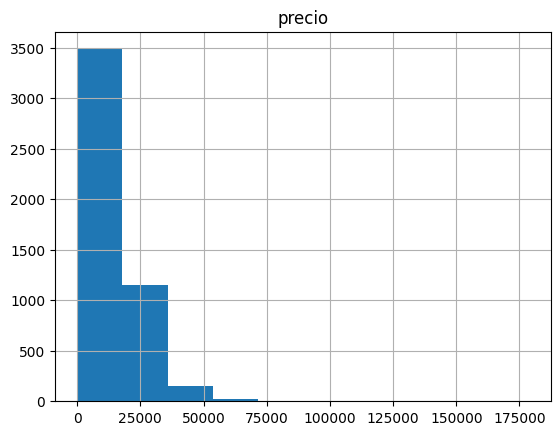

In [ ]:
df_limpio.hist('precio')

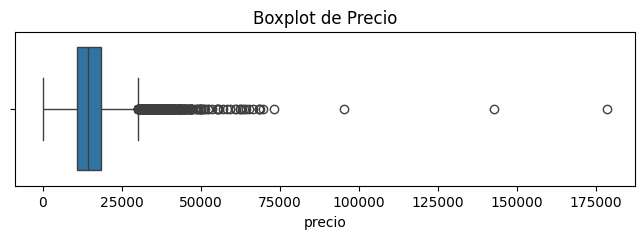

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=df_limpio, x='precio')
plt.title('Boxplot de Precio')
plt.show()

Vemos que hay valores mayores a 75.000 euros, los observamos por separado en otro dataset.

In [ ]:
df_limpio[df_limpio['precio']>75000]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche,serie
90,12402.0,170.0,eco_fuel,grey,hatchback,True,1.0,False,False,0.0,False,1.0,95200.0,3.0,Serie i
4684,103222.0,140.0,diesel,grey,suv,True,1.0,False,True,0.0,True,1.0,142800.0,4.0,Serie X
4753,72515.0,135.0,diesel,blue,suv,False,1.0,True,False,0.0,False,1.0,178500.0,6.0,Serie X


Eliminamos los outliers calculándolos mediante cuantiles y la regla de 1.5·IQR para limpiar los datos antes de entrenar el modelo.

In [ ]:
# Calculamos el percentil 10 (Q1) del precio
Q1 = df_limpio['precio'].quantile(0.1)

# Calculamos el percentil 90 (Q3) del precio
Q3 = df_limpio['precio'].quantile(0.9)

# Calculamos el rango intercuartílico usando estos percentiles
IQR = Q3 - Q1

# Límite inferior para detectar outliers (regla de 1.5 * IQR)
lower = Q1 - 1.5 * IQR

# Límite superior para detectar outliers
upper = Q3 + 1.5 * IQR

# Filtramos las filas cuyo precio está fuera de los límites
outliers = df_limpio[(df_limpio['precio'] < lower) | (df_limpio['precio'] > upper)]

# Mostramos cuántos outliers hay (filas y columnas)
outliers.shape

(25, 15)

Al ver que hay una gran cantidad de valores outliers, decidimos descartar los dos que más sobresalen, debido a su incoherencia por precio y potencia, es muy probable que se deba a un error (se ha añadido un zero de mas, probablemente). Escogemos deshacernos de los coches que de un precio **superior a 75k** con **menos de 200 CV**.

In [ ]:
outliers_price = df_limpio[df_limpio['precio'] > 75000]

# Me quedo solo con los claramente incoherentes (potencia baja y precio altísimo)
idx_err = outliers_price[outliers_price['potencia'] < 200].index

df_limpio = df_limpio.drop(idx_err)

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

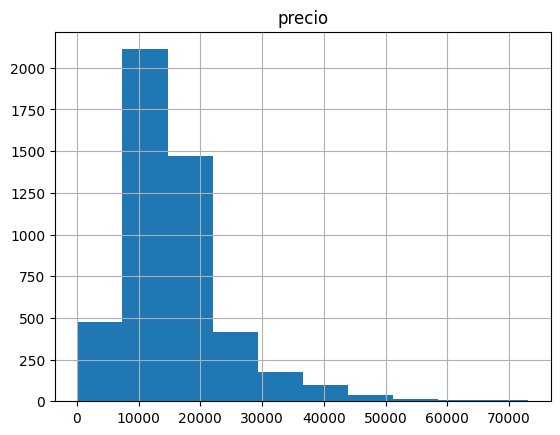

In [ ]:
df_limpio.hist('precio')

## Transformación del precio (logaritmo)

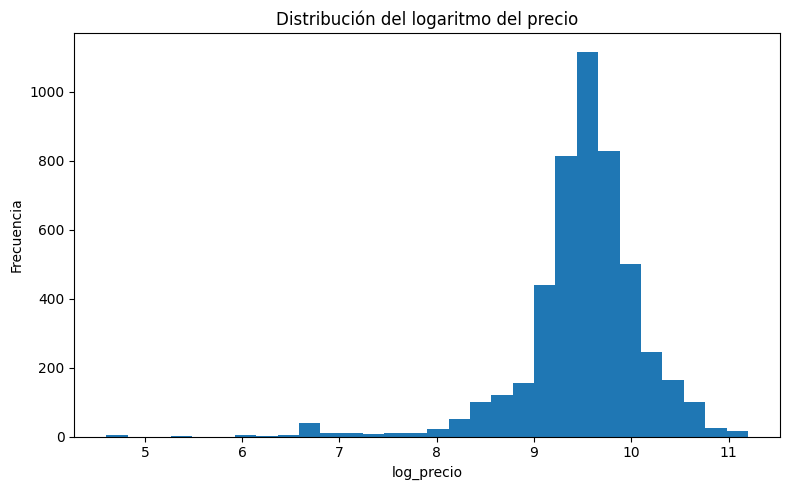

In [ ]:
# Crear la columna del logaritmo del precio
df_limpio['log_precio'] = np.log(df_limpio['precio'])

# Gráfico del logaritmo del precio
plt.figure(figsize=(8,5))
plt.hist(df_limpio['log_precio'], bins=30)
plt.xlabel("log_precio")
plt.ylabel("Frecuencia")
plt.title("Distribución del logaritmo del precio")
plt.tight_layout()
plt.show()

##TARGET VS FEATURES:

Vamos a ver la relación entre el target y las diferentes variables predictivas (features) de nuestro dataset. Para ello, representamos gráficamente el comportamentio del target en función de otras variables. Lo podemos hacer de diferentes maneras:

Violin plot (en el caso de variables categóricas o booleanas)

Boxplot

Scatter plot

In [ ]:
df_limpio.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche,serie,log_precio
0,140411.0,100.0,diesel,black,hatchback,True,1.0,False,True,0.0,True,0.0,11300.0,6.0,Serie 1,9.332558
1,13929.0,317.0,petrol,grey,sedan,True,1.0,False,False,1.0,True,1.0,69700.0,3.0,Serie M,11.151956
2,183297.0,120.0,diesel,white,estate,False,1.0,False,True,0.0,True,0.0,10200.0,6.0,Serie 3,9.230143
3,128035.0,135.0,diesel,red,coupe,True,1.0,False,True,1.0,True,1.0,25100.0,5.0,Serie 4,10.130623
4,97097.0,160.0,diesel,silver,coupe,True,1.0,False,False,1.0,True,1.0,33400.0,5.0,Serie 4,10.416311


Empezamos por las variables BOOL, seguimos con las categoricas, representando ambas en un violinplot, para terminar con las numericas en un scatterplot.

###PRECIO VS VOLANTE_REGULABLE:

/tmp/ipython-input-3136882309.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="volante_regulable", y="precio", data=df_limpio, palette="Wistia")


<Axes: xlabel='volante_regulable', ylabel='precio'>

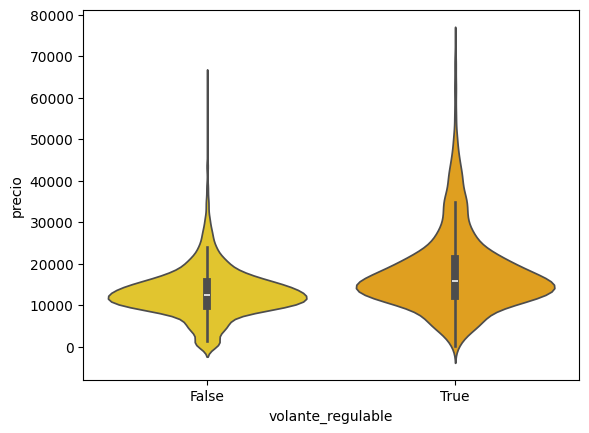

In [ ]:
sns.violinplot(x="volante_regulable", y="precio", data=df_limpio, palette="Wistia")

Observamos una distribucion similar de precio, asi que coincidimos en que el volante regulable no afecta al precio.

### PRECIO VS AIRE_ACONDICIONADO:

/tmp/ipython-input-866087745.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_limpio, y='precio', x= 'aire_acondicionado', palette="Wistia")


<Axes: xlabel='aire_acondicionado', ylabel='precio'>

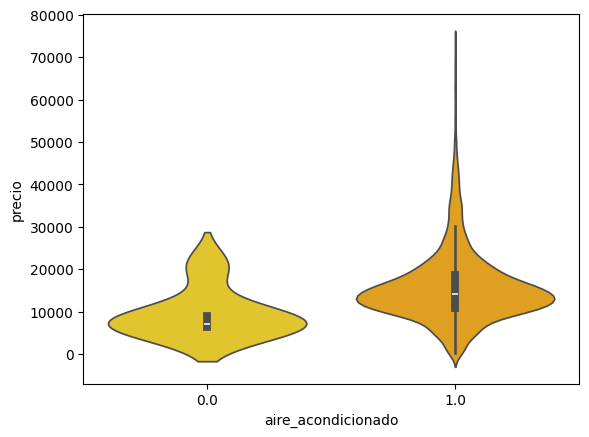

In [ ]:
sns.violinplot(data=df_limpio, y='precio', x= 'aire_acondicionado', palette="Wistia")

Observamos algunos outliers al tener aire_acondicionado, pero la distribución general es muy similar, asi que aire acondicionado no afecta al precio.

###PRECIO VS CAMARA TRASERA

/tmp/ipython-input-257553892.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_limpio, y='precio', x= 'camara_trasera', palette="Wistia")


<Axes: xlabel='camara_trasera', ylabel='precio'>

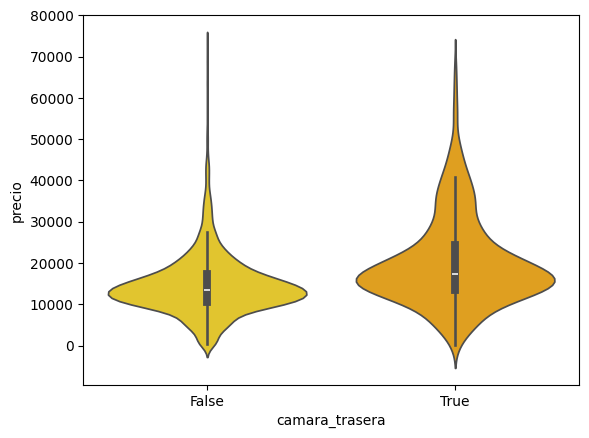

In [ ]:
sns.violinplot(data=df_limpio, y='precio', x= 'camara_trasera', palette="Wistia")

Hay un rango mayor de precio si tienen camara trasera, pero igual que en el ejemplo anterior, la distribución es muy similar, asi que **no afecta al precio.**

###PRECIO VS ELEVALUNAS ELECTRICO

/tmp/ipython-input-2611232438.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_limpio, y='precio', x= 'elevalunas_electrico', palette="Wistia")


<Axes: xlabel='elevalunas_electrico', ylabel='precio'>

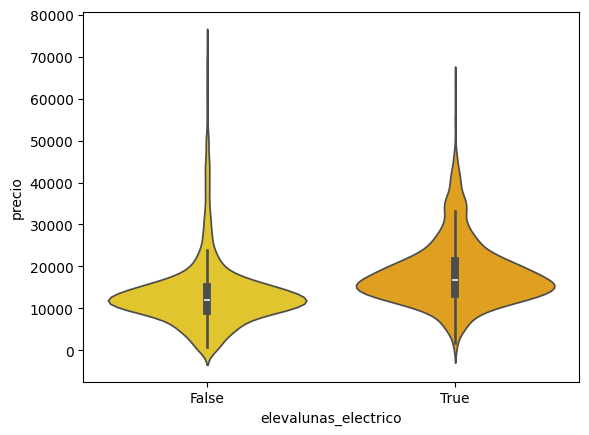

In [ ]:
sns.violinplot(data=df_limpio, y='precio', x= 'elevalunas_electrico', palette="Wistia")

No afecta al precio.

###PRECIO VS BLUETOOTH

/tmp/ipython-input-1988412604.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_limpio, y='precio', x= 'bluetooth', palette="Wistia")


<Axes: xlabel='bluetooth', ylabel='precio'>

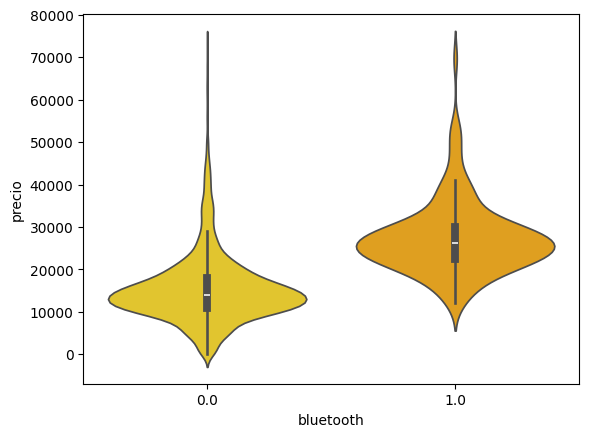

In [ ]:
sns.violinplot(data=df_limpio, y='precio', x= 'bluetooth', palette="Wistia")

Afecta ligeramente al precio.

###PRECIO VS ALERTA_LIM_VELOCIDAD

/tmp/ipython-input-3084302095.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_limpio, y='precio', x= 'alerta_lim_velocidad', palette="Wistia")


<Axes: xlabel='alerta_lim_velocidad', ylabel='precio'>

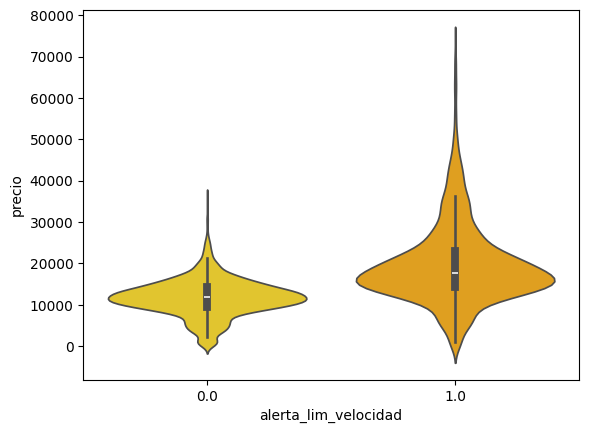

In [ ]:
sns.violinplot(data=df_limpio, y='precio', x= 'alerta_lim_velocidad', palette="Wistia")

El IQR de un coche con alerta de limite de velocidad es ligeramente mas alto, asi que podriamos decir que afecta ligeramente al precio.

###PRECIO VS SERIE

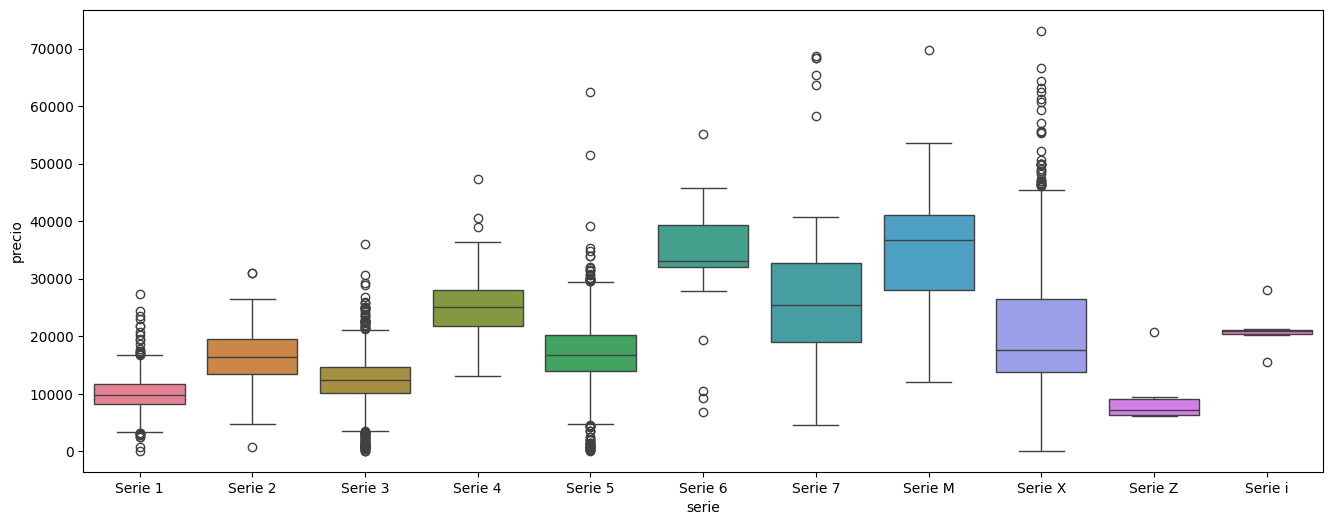

In [ ]:
orden= sorted(df_limpio['serie'].unique())
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_limpio, x="serie", y="precio", hue = 'serie', order=orden, hue_order=orden);

plt.title("Distribución de Precio por Serie de Vehículo", fontsize=16)
plt.xlabel("Serie", fontsize=12)
plt.ylabel("Precio", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

El gráfico evidencia que la serie del vehículo influye de manera directa en el precio, mostrando una progresión clara entre gamas básicas y gamas altas. Las Series 1, 2 y 3 presentan los precios más bajos, con una distribución relativamente compacta, lo que indica que corresponden a modelos de entrada o de gama media. A medida que avanzamos hacia Series 4, 5 y 6, los precios aumentan de forma notable, reflejando un mayor nivel de equipamiento, potencia y prestaciones.

Las Series 7, M y X destacan como las más caras del conjunto, con valores medianos elevados y una gran dispersión, señal de que incluyen modelos de alta gama o versiones especialmente equipadas. Por otro lado, las Series Z e i muestran rangos de precio más específicos y menos variados, propios de líneas más nicho o especializadas. En conjunto, se observa que la serie del vehículo actúa como un indicador claro de su posicionamiento en el mercado y, por tanto, de su precio final.

###PRECIO VS COLOR

/tmp/ipython-input-3976320360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_limpio, y='precio', x= 'color', palette="Wistia")


<Axes: xlabel='color', ylabel='precio'>

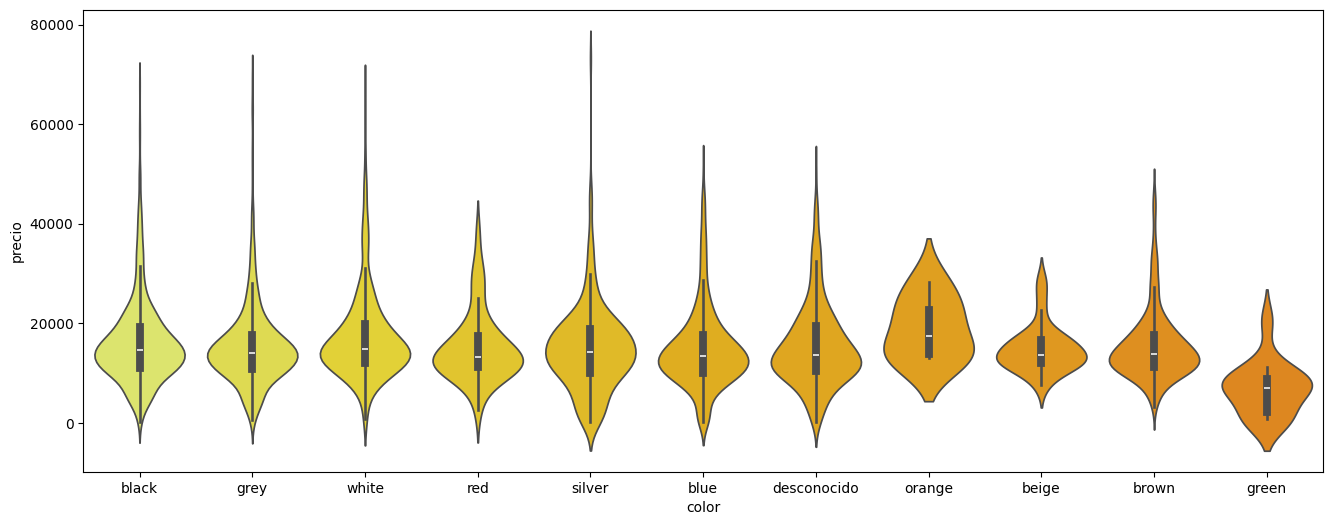

In [ ]:
plt.figure(figsize=(16, 6))
sns.violinplot(data=df_limpio, y='precio', x= 'color', palette="Wistia")

Vemos que el color no influye directamente con el precio.

###PRECIO VS TIPO_COCHE

/tmp/ipython-input-2670747990.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_limpio, y='precio', x= 'tipo_coche', palette="Wistia")


<Axes: xlabel='tipo_coche', ylabel='precio'>

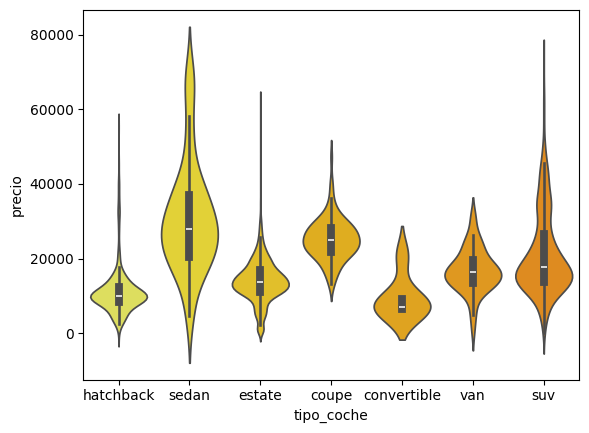

In [ ]:
sns.violinplot(data=df_limpio, y='precio', x= 'tipo_coche', palette="Wistia")

El gráfico muestra que el tipo de coche influye notablemente en el precio. Los sedan son los vehículos más caros y con mayor variabilidad, lo que indica que dentro de esta categoría conviven modelos de distintas gamas. Los coupé y los SUV también presentan precios elevados y relativamente consistentes. Los estate y las van ocupan un rango intermedio, con precios moderados y menos dispersión.
Por otro lado, los hatchback son los modelos más económicos y homogéneos, mientras que los convertible resultan sorprendentemente baratos en este dataset, probablemente por tratarse de versiones más antiguas o de gama baja. En conjunto, se observa que el tipo de carrocería es un factor clave en la variación del precio.

###PRECIO VS TIPO_GASOLINA

/tmp/ipython-input-3477240741.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_limpio, y='precio', x= 'tipo_gasolina', palette="Wistia")


<Axes: xlabel='tipo_gasolina', ylabel='precio'>

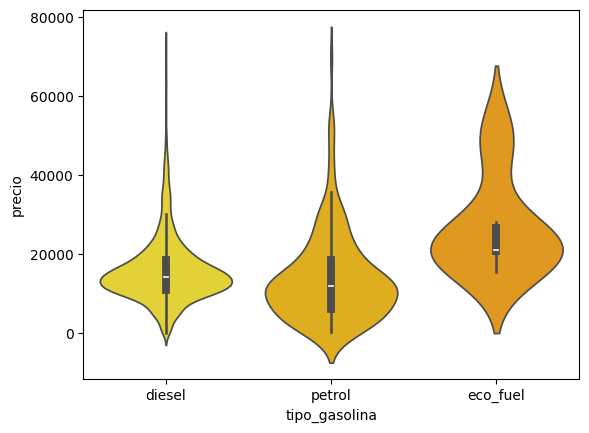

In [ ]:
sns.violinplot(data=df_limpio, y='precio', x= 'tipo_gasolina', palette="Wistia")

Vemos que el tipo de gasolina no influye con el precio. Los coches del grupo eco_fuel son ligeramente mas caros.

###PRECIO VS POTENCIA

<Axes: xlabel='potencia', ylabel='precio'>

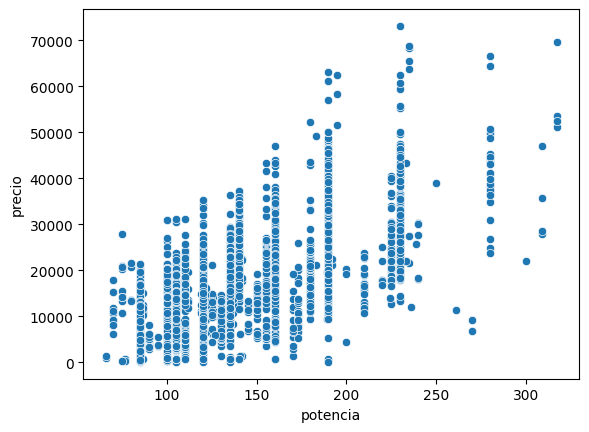

In [ ]:
sns.scatterplot(x="potencia", y="precio", data=df_limpio)

Podemos ver que hay una correlacion directamente proporcional entre potencia y precio.

###PRECIO VS AÑO_REGISTRO

<Axes: xlabel='edad_coche', ylabel='precio'>

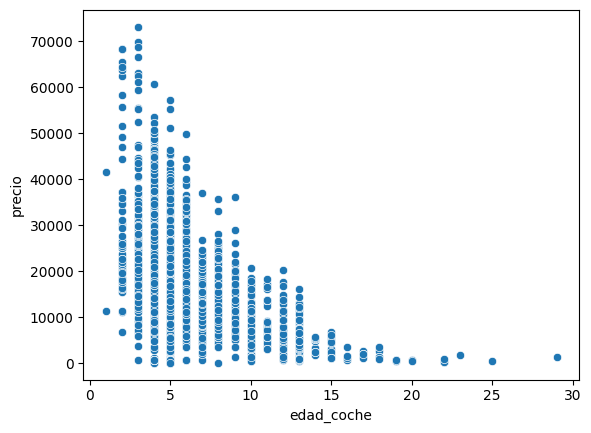

In [ ]:
sns.scatterplot(x="edad_coche", y="precio", data=df_limpio)

El gráfico muestra una clara relación inversa entre la edad del coche y su precio: los vehículos más nuevos concentran los valores más altos y presentan una gran variabilidad según el modelo y el equipamiento, mientras que, a medida que aumenta la edad, el precio desciende de forma progresiva y la dispersión se reduce. A partir de unos 12–15 años, la mayoría de coches se sitúan en precios muy bajos y prácticamente dejan de diferenciarse entre sí, lo que evidencia que la edad es uno de los factores más determinantes en la depreciación del vehículo.

# PASO 4: PREPROCESSAMIENTO DE VARIABLES

## One-hot encoding de las variables categóricas

In [ ]:
# Convertir 'booleanos' a 0/1 a integer
bool_cols = ['volante_regulable','aire_acondicionado','camara_trasera',
             'elevalunas_electrico','bluetooth','alerta_lim_velocidad','gps']

df_limpio[bool_cols] = df_limpio[bool_cols].astype(int)

# One-hot encoding de las columnas categorícas
df_encoded = pd.get_dummies(df_limpio, columns=['serie','tipo_coche','tipo_gasolina','color'], drop_first=False)

# Convertir columnas bool a int
bool_cols = df_encoded.select_dtypes('bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Comprobación final
df_encoded.dtypes.value_counts()

,count
int64,39
float64,5


## Normalizar Variables numéricas entre 0 y 1

In [ ]:
num_cols = ['km','potencia','edad_coche']
scaler = MinMaxScaler(feature_range=(0, 1))
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [ ]:
# Un ultimo vistazo a las correlaciones una vez hechas las transformaciones
corr = df_encoded.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,edad_coche,log_precio,serie_Serie 1,serie_Serie 2,serie_Serie 3,serie_Serie 4,serie_Serie 5,serie_Serie 6,serie_Serie 7,serie_Serie M,serie_Serie X,serie_Serie Z,serie_Serie i,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_suv,tipo_coche_van,tipo_gasolina_diesel,tipo_gasolina_eco_fuel,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_desconocido,color_green,color_grey,color_orange,color_red,color_silver,color_white
km,1.000000,-0.043818,0.066403,0.021768,0.004588,0.048954,-0.141891,0.155570,0.000500,-0.429527,0.538216,-0.435032,-0.123099,-0.130809,0.110454,-0.140939,0.173790,-0.033634,0.002101,-0.034138,-0.113833,-0.021768,-0.038253,-0.021768,-0.140939,0.260313,-0.131924,-0.017572,-0.113833,-0.130809,0.044117,-0.042977,-0.035145,-0.009166,0.034663,-0.018569,-0.021558,0.001199,0.042896,0.026881,-0.031288,-0.021152,0.026709,-0.069126
potencia,-0.043818,1.000000,0.327890,-0.000257,0.311420,0.346370,0.180844,0.006004,0.505813,0.674868,-0.101589,0.508289,-0.326218,-0.059199,-0.294119,0.056742,0.210766,0.206228,0.195812,0.288542,0.239987,0.000257,-0.041874,0.000257,0.056742,-0.107635,-0.273884,0.325561,0.239987,-0.059199,-0.108740,0.017349,0.107391,-0.020042,0.037003,-0.011796,-0.054322,-0.006090,-0.016604,0.004765,0.011748,-0.025436,0.014265,0.003963
volante_regulable,0.066403,0.327890,1.000000,-0.031980,0.253650,0.278317,0.062027,0.242785,0.364056,0.285899,0.049337,0.250568,-0.243587,-0.063909,-0.203689,0.047957,0.270178,0.070477,0.092455,0.042150,0.102181,0.031980,-0.003557,0.031980,0.047957,0.033443,-0.221152,0.100487,0.102181,-0.063909,0.009365,0.013765,-0.012826,-0.025613,0.025504,0.011586,0.039446,-0.026911,0.010084,0.050555,0.008288,-0.035668,-0.014958,-0.100528
aire_acondicionado,0.021768,-0.000257,-0.031980,1.000000,0.017748,0.020877,0.005802,-0.009476,0.035396,0.025791,-0.018433,0.025148,0.012869,0.003626,0.027148,0.005181,0.019652,0.002755,0.003770,0.002557,0.018766,-1.000000,0.001250,-1.000000,0.005181,0.043932,0.013318,0.004572,0.018766,0.003626,0.170112,0.001615,-0.174744,0.003115,-0.027364,0.013873,0.009157,0.011240,0.001911,0.004680,-0.165625,0.003476,0.008961,0.011752
camara_trasera,0.004588,0.311420,0.253650,0.017748,1.000000,0.199139,0.011833,0.061867,0.219049,0.262354,0.004257,0.197024,-0.103536,-0.020780,-0.152193,-0.001180,0.098754,0.094924,0.128683,0.028635,0.108408,-0.017748,-0.003050,-0.017748,-0.001180,-0.064657,-0.078910,0.122872,0.108408,-0.020780,-0.007689,-0.011532,0.010585,-0.020464,0.022630,-0.001527,-0.016634,-0.031914,0.011388,0.015834,-0.017748,-0.028026,0.001390,0.003127
elevalunas_electrico,0.048954,0.346370,0.278317,0.020877,0.199139,1.000000,0.112130,0.201093,0.290875,0.285762,-0.069316,0.321278,-0.189763,-0.074259,-0.157710,0.108971,0.249005,0.051919,0.055874,0.031776,0.031464,-0.020877,-0.032699,-0.020877,0.108971,0.060507,-0.176191,0.064294,0.031464,-0.074259,-0.002651,-0.014748,0.006175,-0.024150,0.079008,-0.036208,-0.021014,-0.011990,-0.026752,-0.017030,0.014590,-0.022317,-0.032756,0.014859
bluetooth,-0.141891,0.180844,0.062027,0.005802,0.011833,0.112130,1.000000,-0.002898,0.163929,0.223895,-0.119740,0.171592,-0.059723,-0.016827,-0.125992,0.892932,-0.091206,-0.012787,-0.017495,0.440704,-0.087093,-0.005802,-0.005802,-0.005802,0.892932,-0.203886,-0.061810,0.234825,-0.087093,-0.016827,-0.103156,-0.007494,0.107492,-0.014456,0.005804,0.023715,-0.037131,0.001966,-0.008871,-0.015450,-0.005802,-0.002759,0.018569,0.006377
gps,0.155570,0.006004,0.242785,-0.009476,0.061867,0.201093,-0.002898,1.000000,-0.009709,0.010546,0.084346,0.048907,0.022432,-0.029932,0.000720,-0.012948,0.086232,0.020884,0.028572,0.019382,-0.111019,0.009476,0.009476,0.009476,-0.012948,0.075677,0.027773,0.034651,-0.111019,-0.029932,0.044548,0.012239,-0.048531,0.023609,0.049559,0.007235,0.035111,-0.015703,-0.000954,0.02478

In [ ]:
# .info() para el pantallazo de todas las columnas de todas las columnas de df final
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4805 entries, 0 to 4842
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   km                      4805 non-null   float64
 1   potencia                4805 non-null   float64
 2   volante_regulable       4805 non-null   int64  
 3   aire_acondicionado      4805 non-null   int64  
 4   camara_trasera          4805 non-null   int64  
 5   elevalunas_electrico    4805 non-null   int64  
 6   bluetooth               4805 non-null   int64  
 7   gps                     4805 non-null   int64  
 8   alerta_lim_velocidad    4805 non-null   int64  
 9   precio                  4805 non-null   float64
 10  edad_coche              4805 non-null   float64
 11  log_precio              4805 non-null   float64
 12  serie_Serie 1           4805 non-null   int64  
 13  serie_Serie 2           4805 non-null   int64  
 14  serie_Serie 3           4805 non-null   int64

In [ ]:
# Crear y exportar el df con las primeras 50 filas del dataset
bmw_50filas = df_encoded.head(50)
bmw_50filas.to_excel('bmw_50filas.xlsx', index=False)

## GUARDAR DATASET LIMPIO DE NULOS

In [ ]:
df_encoded.to_pickle('bmw_final.pkl')